In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#資料預處理

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images.reshape(len(train_images), 28, 28, 1), test_images.reshape(len(test_images), 28, 28, 1)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
def drawChart(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

In [4]:
model = models.Sequential([
    layers.Conv2D(16, (5,5), activation="relu", padding="same", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(36, (5,5), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.6),
    layers.Dense(10, activation="softmax"),
])

In [5]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=300, validation_data=(test_images, test_labels))

Epoch 1/5
200/200 [==============================] - 2s 11ms/step - loss: 1.8748 - accuracy: 0.5933 - val_loss: 1.5246 - val_accuracy: 0.9392
Epoch 2/5
200/200 [==============================] - 2s 10ms/step - loss: 1.6872 - accuracy: 0.7789 - val_loss: 1.5031 - val_accuracy: 0.9586
Epoch 3/5
200/200 [==============================] - 2s 10ms/step - loss: 1.6340 - accuracy: 0.8313 - val_loss: 1.4987 - val_accuracy: 0.9626
Epoch 4/5
200/200 [==============================] - 2s 10ms/step - loss: 1.6078 - accuracy: 0.8562 - val_loss: 1.4917 - val_accuracy: 0.9702
Epoch 5/5
200/200 [==============================] - 2s 12ms/step - loss: 1.5927 - accuracy: 0.8714 - val_loss: 1.4877 - val_accuracy: 0.9740


313/313 [==============================] - 1s 3ms/step - loss: 1.4877 - accuracy: 0.9740


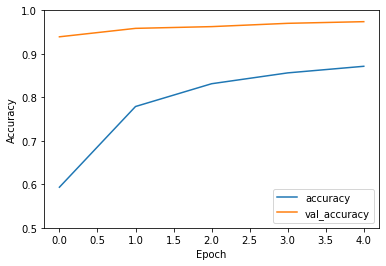

In [6]:
drawChart(history)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

In [7]:
model.save('save/mnist.h5')

In [8]:
#load model and evaluate
loadModel = models.load_model('save/mnist.h5')
loadModel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
test_loss, test_acc = loadModel.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.4877 - accuracy: 0.9740
